In [1]:
import numpy as np
import random
from grid_world import GridWorld
from draw import draw
from tqdm import tqdm
from experience_replay_buffer import ExperienceReplayBuffer

rows = 5
cols = 5
env = GridWorld(
    forbidden_score=-10,
    terminal_score=1,
    desc=[".....", ".##..", "..#..", ".#T#.", ".#..."],
)
env.render_grid()


⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


  0%|          | 0/1000 [00:00<?, ?it/s]

➡️⬆️⬅️➡️➡️
🔄⏩️⏪⬆️🔄
⬇️🔄⏪⬆️⬇️
⬅️⏩️✅⏫️⬆️
⬇️⏪⬅️➡️⬇️


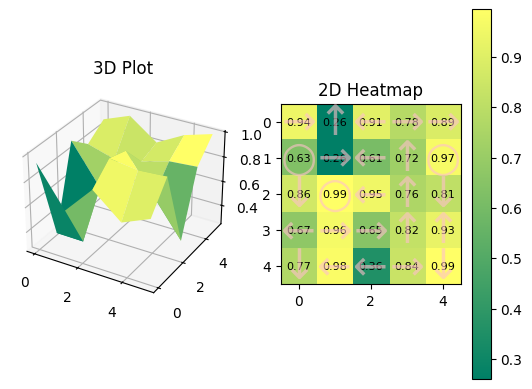

 14%|█▎        | 137/1000 [00:00<00:01, 473.23it/s]

⬇️⬅️➡️➡️⬇️
⬇️⏬⏩️➡️🔄
➡️🔄⏬➡️⬆️
🔄⏩️✅⏪⬆️
⬆️⏩️⬆️⬅️⬆️


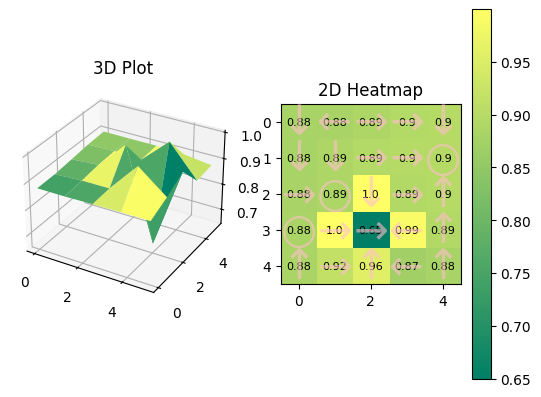

 34%|███▍      | 339/1000 [00:00<00:01, 504.93it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️⬇️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


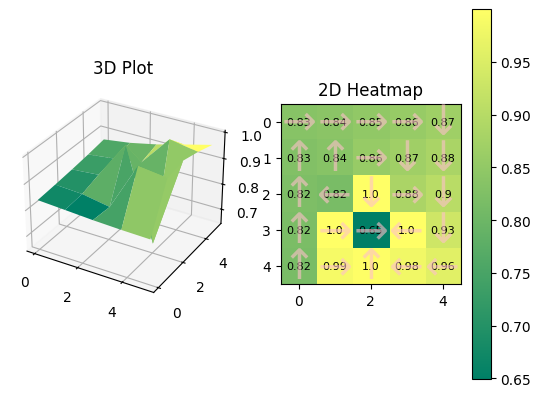

 60%|█████▉    | 597/1000 [00:01<00:00, 534.36it/s]

➡️➡️➡️⬇️⬇️
⬆️⏫️⏩️⬇️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


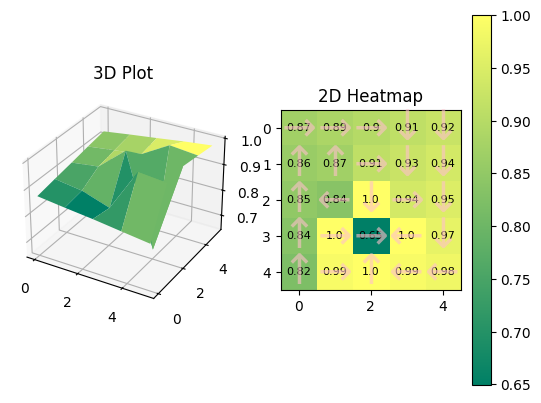

 79%|███████▉  | 794/1000 [00:01<00:00, 515.55it/s]

➡️➡️➡️⬇️⬇️
⬆️⏫️⏩️⬇️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


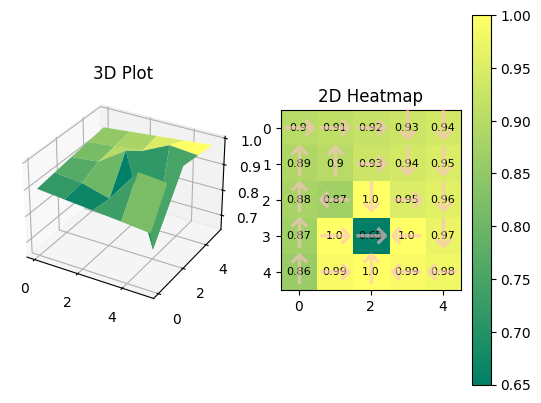

100%|██████████| 1000/1000 [00:02<00:00, 448.43it/s]


In [3]:
policy = 0.2 * np.ones((rows * cols, 5))
episodes = [
    env.get_traj(10, action=random.randint(0, 4), policy=policy) for i in range(500)
]
experience_pool = ExperienceReplayBuffer(max_size=10000)
for traj in episodes:
    for exp in traj:
        experience_pool.add_experience(exp)

action_values = np.random.rand(25, 5)
learning_rate = 0.01
gamma = 0.99
batch_size = 500

for _ in tqdm(range(1000)):
    exps = experience_pool.sample_exps(batch_size=batch_size)
    for trajectory in exps:
        tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory

        next_action_value = action_values[nextState].max()
        target = tmpscore + (1.0 - terminal) * gamma * next_action_value
        TD_error = action_values[tmpstate][tmpaction] - target

        action_values[tmpstate][tmpaction] -= learning_rate * TD_error

    if _ % 200 == 0:
        policy = np.eye(5)[np.argmax(action_values, axis=1)]
        env.render_policy(policy)

        state_values = np.max(action_values, axis=1)
        p = np.argmax(action_values, axis=1)
        draw(state_values.reshape(5, 5), p)
